<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Funtion

In [36]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w,b}(x) = \frac{1}{1+e^{-(wx + b)}}$

In [37]:
def sigmoid(x, w, b):
  return 1/(1+np.exp(-(w*x + b)))

In [38]:
sigmoid(1,3,5)

0.9996646498695336

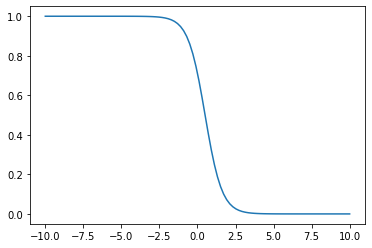

In [39]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.9    #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
# X will iterate and gives a nparray as output
plt.plot(X,Y)
plt.show() 

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+ w_2x_2 + b)}}$

In [40]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [41]:
from mpl_toolkits import mplot3d

In [42]:
w1 = 0.5
w2 = 2
b = 0

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)
Y = sigmoid_2d(XX1,XX2,w1,w2,b)


In [43]:
Y.shape

(100, 100)

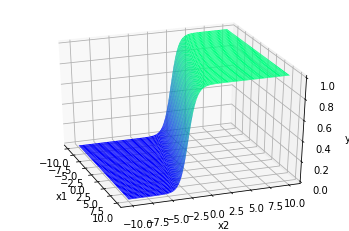

In [44]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(XX1, XX2, Y, cmap='winter')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 360-20)
plt.show()

#Compute Loss for a given Dataset

In [45]:
w_unkwn = 0.5
b_unkwn = 0.25

X = np.random.random(25) * 20 -10
Y = sigmoid(X, w_unkwn, b_unkwn)

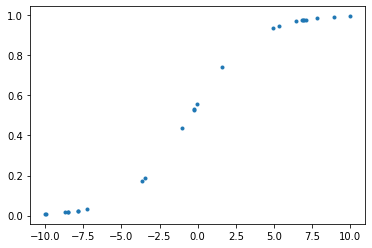

In [46]:
plt.plot(X, Y, '.')
plt.show()

In [47]:
def cal_loss(X, Y, w_est, b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x, w_est, b_est))**2
  return loss

In [61]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [62]:
Loss.shape

(101, 101)

In [63]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = cal_loss(X,Y, WW[i, j], BB[i,j])

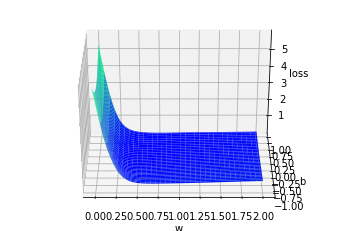

In [64]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(WW, BB, Loss, cmap='winter')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.view_init(30, 360-90)
plt.show()

In [65]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [66]:
print(i,j)

63 25


In [67]:
print(WW[i,j], BB[i,j])

0.5 0.26
